In [762]:
import pulp
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp
from docplex.mp.model import Model
from gurobipy import GRB

# Graficos
plt.rcParams['font.family'] = "serif"
plt.style.use('ggplot')
colores = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00']

# Datos
data = [
    [9, 13, 15 ,20],
    [11, 17, 18, 24],
    [8, 12, 14, 18],
    [6, 10, 12, 15]
]

# Modelo usa notacion T_{MxN} donde M es el numero de maquinas y N el numero de trabajos
T = np.transpose(data)

M = len(T[0]) # Numero de maquinas
N = len(T) # Numero de trabajos

# Formulación Wagner

## Modelo PulP

In [763]:
wagner_model_pulp = pulp.LpProblem("Wagner_Model_Pulp",pulp.LpMinimize) # Problema de minimización

# Variables de decision
X = pulp.LpVariable.dicts("X",(range(N),range(M)),lowBound=0, cat=pulp.LpContinuous)
Y = pulp.LpVariable.dicts("Y",(range(N),range(M)),lowBound=0, cat=pulp.LpContinuous)
Z = pulp.LpVariable.dicts("Z",(range(N),range(N)),lowBound=0, cat=pulp.LpBinary)

# Funcion objetivo (Restriccion 5)
wagner_model_pulp += pulp.lpSum(T[M-1][i] for i in range(N)) + pulp.lpSum(X[M-1][p] for p in range(N))

# Restriccion 1
for i in range(N):
    wagner_model_pulp += pulp.lpSum(Z[i][j] for j in range(N)) == 1

# Restriccion 2
for j in range(N):
    wagner_model_pulp += pulp.lpSum(Z[i][j] for i in range(N)) == 1

# Restriccion 3
for j in range(N - 1):
    for r in range(M - 1):
        wagner_model_pulp += pulp.lpSum(T[r][i] * Z[i][j+1] for i in range(N)) - pulp.lpSum(T[r+1][i] * Z[i][j] for i in range(N)) + X[r][j+1] - X[r+1][j+1] + Y[r][j+1] - Y[r][j] == 0

# Restriccion 4
for r in range(M - 1):
    wagner_model_pulp += pulp.lpSum(T[r][i]*Z[i][0] for i in range(N)) + X[r][0] - X[r+1][0] + Y[r][0] == 0

# Resolver
wagner_model_pulp.solve(pulp.PULP_CBC_CMD(msg=False))

# Imprimir resultados
print("Status:", pulp.LpStatus[wagner_model_pulp.status])
print("Funcion objetivo = ", pulp.value(wagner_model_pulp.objective))

Status: Optimal
Funcion objetivo =  105.0


### Carta Gantt

In [764]:
print("hola")

hola


## Modelo Cplex

In [765]:
wagner_model_cplex = Model(name='Wagner_Model_Cplex')

# Variables de decisión
X = wagner_model_cplex.continuous_var_matrix(keys1=range(N), keys2=range(M), name="X")
Y = wagner_model_cplex.continuous_var_matrix(keys1=range(N), keys2=range(M), name="Y")
Z = wagner_model_cplex.binary_var_matrix(keys1=range(N), keys2=range(N), name="Z")

# Función objetivo (Restricción 5)
wagner_model_cplex.minimize(wagner_model_cplex.sum(T[M-1][i] for i in range(N)) + wagner_model_cplex.sum(X[M-1, p] for p in range(N)))

# Restricción 1
for i in range(N):
    wagner_model_cplex.add_constraint(wagner_model_cplex.sum(Z[i, j] for j in range(N)) == 1)

# Restricción 2
for j in range(N):
    wagner_model_cplex.add_constraint(wagner_model_cplex.sum(Z[i, j] for i in range(N)) == 1)

# Restricción 3
for j in range(N - 1):
    for r in range(M - 1):
        wagner_model_cplex.add_constraint(wagner_model_cplex.sum(T[r][i] * Z[i, j+1] for i in range(N)) - wagner_model_cplex.sum(T[r+1][i] * Z[i, j] for i in range(N)) + X[r, j+1] - X[r+1, j+1] + Y[r, j+1] - Y[r, j] == 0)

# Restricción 4
for r in range(M - 1):
    wagner_model_cplex.add_constraint(wagner_model_cplex.sum(T[r][i] * Z[i, 0] for i in range(N)) + X[r, 0] - X[r+1, 0] + Y[r, 0] == 0)

# Resolver
wagner_model_cplex.solve()

# Imprimir resultados
print("Status:", wagner_model_cplex.get_solve_status())
print("Función objetivo =", wagner_model_cplex.objective_value)

Status: JobSolveStatus.OPTIMAL_SOLUTION
Función objetivo = 105.0


### Carta Gantt

In [766]:
print("hola")

hola


## Modelo Gurobi

In [767]:
wagner_model_gurobi = gp.Model("Wagner_Model_Gurobi")

# Variables de decisión
X = wagner_model_gurobi.addVars(range(N), range(M), lb=0, vtype=GRB.CONTINUOUS, name="X")
Y = wagner_model_gurobi.addVars(range(N), range(M), lb=0, vtype=GRB.CONTINUOUS, name="Y")
Z = wagner_model_gurobi.addVars(range(N), range(N), vtype=GRB.BINARY, name="Z")

# Función objetivo (Restricción 5)
wagner_model_gurobi.setObjective(gp.quicksum(T[M-1][i] for i in range(N)) + gp.quicksum(X[M-1, p] for p in range(N)), GRB.MINIMIZE)

# Restricción 1
for i in range(N):
    wagner_model_gurobi.addConstr(gp.quicksum(Z[i, j] for j in range(N)) == 1)

# Restricción 2
for j in range(N):
    wagner_model_gurobi.addConstr(gp.quicksum(Z[i, j] for i in range(N)) == 1)

# Restricción 3
for j in range(N - 1):
    for r in range(M - 1):
        wagner_model_gurobi.addConstr(gp.quicksum(T[r][i] * Z[i, j+1] for i in range(N)) - gp.quicksum(T[r+1][i] * Z[i, j] for i in range(N)) + X[r, j+1] - X[r+1, j+1] + Y[r, j+1] - Y[r, j] == 0)

# Restricción 4
for r in range(M - 1):
    wagner_model_gurobi.addConstr(gp.quicksum(T[r][i] * Z[i, 0] for i in range(N)) + X[r, 0] - X[r+1, 0] + Y[r, 0] == 0)

# Resolver sin mostrar output
wagner_model_gurobi.Params.OutputFlag = 0
wagner_model_gurobi.optimize()

# Imprimir resultados
print("Status:", wagner_model_gurobi.Status)
print("Función objetivo =", wagner_model_gurobi.ObjVal)

Status: 2
Función objetivo = 105.0


### Carta Gantt

In [768]:
print("hola")

hola


# Formulación Wilson

## Modelo PulP

In [769]:
wilson_model_pulp = pulp.LpProblem("Wilson_Model_Pulp",pulp.LpMinimize) # Problema de minimización

# Variables de decision
B = pulp.LpVariable.dicts("B",(range(M),range(N)),lowBound=0, cat=pulp.LpInteger)
Z = pulp.LpVariable.dicts("Z",(range(N),range(N)),lowBound=0, cat=pulp.LpBinary)

# Funcion objetivo
wilson_model_pulp += B[M-1][N-1] + pulp.lpSum(T[M-1][i]*Z[i][N-1] for i in range(N))

# Restriccion 1
for i in range(N):
    wilson_model_pulp += pulp.lpSum(Z[i][j] for j in range(N)) == 1

# Restriccion 2
for j in range(N):
    wilson_model_pulp += pulp.lpSum(Z[i][j] for i in range(N)) == 1

# Restriccion 3
for j in range(N - 1):
    wilson_model_pulp += B[0][j] + pulp.lpSum(T[0][i]*Z[i][j] for i in range(N)) == B[0][j+1]

# Restriccion 4
wilson_model_pulp += B[0][0] == 0

# Restriccion 5
for r in range(M - 1):
    wilson_model_pulp += B[r][0] + pulp.lpSum(T[r][i]*Z[i][0] for i in range(N)) == B[r+1][0]

# Restriccion 6
for r in range(M - 1):
    for j in range(1,N):
        wilson_model_pulp += B[r][j] + pulp.lpSum(T[r][i]*Z[i][j] for i in range(N)) <= B[r+1][j]

# Restriction 7
for r in range(1,M):
    for j in range(N - 1):
        wilson_model_pulp += B[r][j] + pulp.lpSum(T[r][i]*Z[i][j] for i in range(N)) <= B[r][j+1]

# Resolver
wilson_model_pulp.solve(pulp.PULP_CBC_CMD(msg=False))

# Imprimir resultados
print("Status:", pulp.LpStatus[wilson_model_pulp.status])
print("Funcion objetivo = ", pulp.value(wilson_model_pulp.objective))

Status: Optimal
Funcion objetivo =  105.0


### Carta Gantt

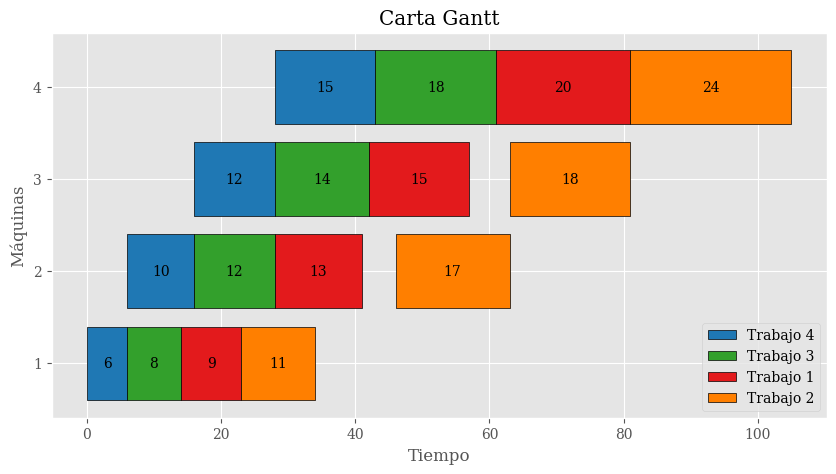

In [770]:
# Obtener la secuencia de trabajos
secuencia = []
for i in range(N):
    for j in range(N):
        if pulp.value(Z[i][j]) == 1:
            secuencia.append([i, j])

# Ordenar la secuencia 
secuencia.sort(key=lambda x: x[1])

# Carta Gantt
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Carta Gantt')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Máquinas')
ax.set_yticks(range(N))
ax.set_yticklabels(range(1, N + 1))
ax.grid(True)

for i in range(N):
    for j in range(M):
        start_time = B[i][j].varValue
        processing_time = T[i][secuencia[j][0]]
        ax.broken_barh([(start_time, processing_time)], (i - 0.4, 0.8), facecolors=colores[j], edgecolor='black')
        ax.text(start_time + processing_time / 2, i, str(processing_time), horizontalalignment='center', verticalalignment='center')

# Mostrar leyenda esquina inferrior derecha
ax.legend(["Trabajo "+str(i+1) for i,j in secuencia], loc='lower right')
plt.show()

## Modelo Cplex

In [771]:
wilson_model_cplex = Model(name='Wilson_Model_Cplex')

# Variables de decisión
B = wilson_model_cplex.integer_var_matrix(keys1=range(M), keys2=range(N), name="B")
Z = wilson_model_cplex.binary_var_matrix(keys1=range(N), keys2=range(N), name="Z")

# Función objetivo
wilson_model_cplex.minimize(B[M-1, N-1] + wilson_model_cplex.sum(T[M-1][i]*Z[i, N-1] for i in range(N)))

# Restricción 1
for i in range(N):
    wilson_model_cplex.add_constraint(wilson_model_cplex.sum(Z[i, j] for j in range(N)) == 1)

# Restricción 2
for j in range(N):
    wilson_model_cplex.add_constraint(wilson_model_cplex.sum(Z[i, j] for i in range(N)) == 1)

# Restricción 3
for j in range(N - 1):
    wilson_model_cplex.add_constraint(B[0, j] + wilson_model_cplex.sum(T[0][i]*Z[i, j] for i in range(N)) == B[0, j+1])

# Restricción 4
wilson_model_cplex.add_constraint(B[0, 0] == 0)

# Restricción 5
for r in range(M - 1):
    wilson_model_cplex.add_constraint(B[r, 0] + wilson_model_cplex.sum(T[r][i]*Z[i, 0] for i in range(N)) == B[r+1, 0])

# Restricción 6
for r in range(M - 1):
    for j in range(1,N):
        wilson_model_cplex.add_constraint(B[r, j] + wilson_model_cplex.sum(T[r][i]*Z[i, j] for i in range(N)) <= B[r+1, j])

# Restricción 7
for r in range(1,M):
    for j in range(N - 1):
        wilson_model_cplex.add_constraint(B[r, j] + wilson_model_cplex.sum(T[r][i]*Z[i, j] for i in range(N)) <= B[r, j+1])

# Resolver
wilson_model_cplex.solve()

# Imprimir resultados
print("Status:", wilson_model_cplex.get_solve_status())
print("Función objetivo =", wilson_model_cplex.objective_value)

Status: JobSolveStatus.OPTIMAL_SOLUTION
Función objetivo = 105.0


### Carta Gantt

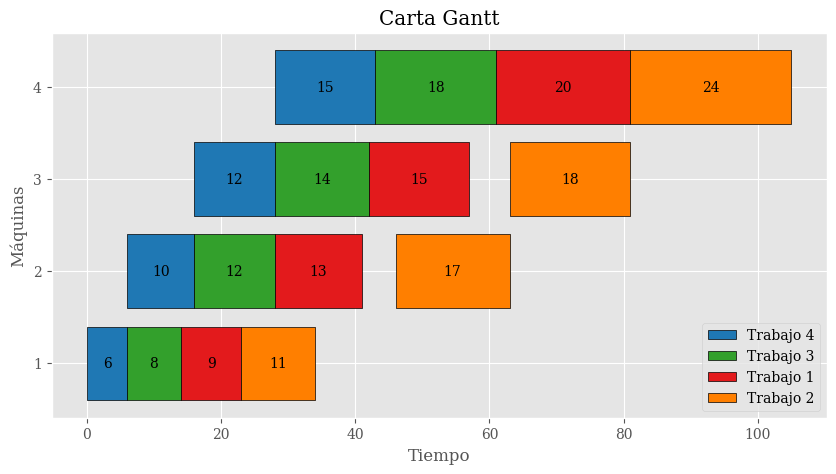

In [772]:
# Obtener la secuencia de trabajos
secuencia = []
for i in range(N):
    for j in range(N):
        if wilson_model_cplex.solution.get_value(Z[i, j]) == 1:
            secuencia.append([i, j])

# Ordenar la secuencia 
secuencia.sort(key=lambda x: x[1])

# Carta Gantt
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Carta Gantt')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Máquinas')
ax.set_yticks(range(N))
ax.set_yticklabels(range(1, N + 1))
ax.grid(True)

for i in range(N):
    for j in range(M):
        start_time = wilson_model_cplex.solution.get_value(B[i, j])
        processing_time = T[i][secuencia[j][0]]
        ax.broken_barh([(start_time, processing_time)], (i - 0.4, 0.8), facecolors=colores[j], edgecolor='black')
        ax.text(start_time + processing_time / 2, i, str(processing_time), horizontalalignment='center', verticalalignment='center')

# Mostrar leyenda esquina inferrior derecha
ax.legend(["Trabajo "+str(i+1) for i,j in secuencia], loc='lower right')
plt.show()

## Modelo Gurobi

In [773]:
wilson_model_gurobi = gp.Model("Wilson_Model_Gurobi")

# Variables de decisión
B = wilson_model_gurobi.addVars(range(M), range(N), lb=0, vtype=GRB.INTEGER, name="B")
Z = wilson_model_gurobi.addVars(range(N), range(N), vtype=GRB.BINARY, name="Z")

# Función objetivo
wilson_model_gurobi.setObjective(B[M-1, N-1] + gp.quicksum(T[M-1][i]*Z[i, N-1] for i in range(N)), GRB.MINIMIZE)

# Restricción 1
for i in range(N):
    wilson_model_gurobi.addConstr(gp.quicksum(Z[i, j] for j in range(N)) == 1)

# Restricción 2
for j in range(N):
    wilson_model_gurobi.addConstr(gp.quicksum(Z[i, j] for i in range(N)) == 1)

# Restricción 3
for j in range(N - 1):
    wilson_model_gurobi.addConstr(B[0, j] + gp.quicksum(T[0][i]*Z[i, j] for i in range(N)) == B[0, j+1])

# Restricción 4
wilson_model_gurobi.addConstr(B[0, 0] == 0)

# Restricción 5
for r in range(M - 1):
    wilson_model_gurobi.addConstr(B[r, 0] + gp.quicksum(T[r][i]*Z[i, 0] for i in range(N)) == B[r+1, 0])

# Restricción 6
for r in range(M - 1):
    for j in range(1,N):
        wilson_model_gurobi.addConstr(B[r, j] + gp.quicksum(T[r][i]*Z[i, j] for i in range(N)) <= B[r+1, j])

# Restricción 7
for r in range(1,M):
    for j in range(N - 1):
        wilson_model_gurobi.addConstr(B[r, j] + gp.quicksum(T[r][i]*Z[i, j] for i in range(N)) <= B[r, j+1])

# Resolver
wilson_model_gurobi.Params.OutputFlag = 0
wilson_model_gurobi.optimize()

# Imprimir resultados
print("Status:", wilson_model_gurobi.Status)
print("Función objetivo =", wilson_model_gurobi.ObjVal)

Status: 2
Función objetivo = 105.0


### Carta Gantt

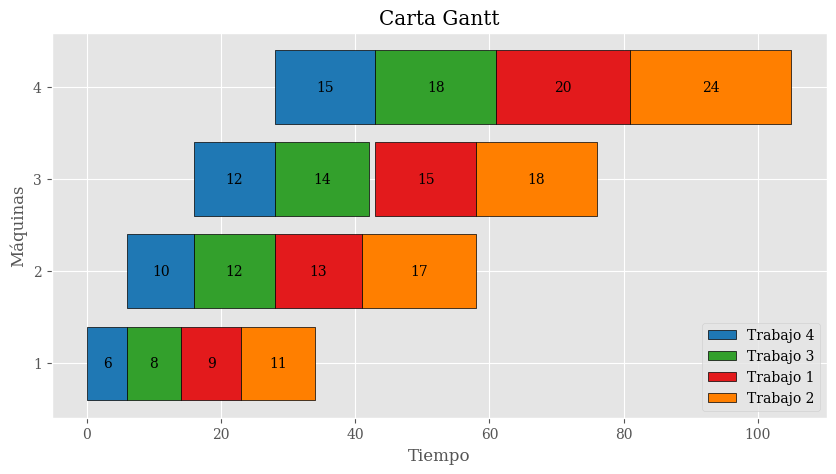

In [774]:
# Obtener la secuencia de trabajos
secuencia = []
for i in range(N):
    for j in range(N):
        if Z[i, j].x == 1:
            secuencia.append([i, j])

# Ordenar la secuencia 
secuencia.sort(key=lambda x: x[1])

# Carta Gantt
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Carta Gantt')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Máquinas')
ax.set_yticks(range(N))
ax.set_yticklabels(range(1, N + 1))
ax.grid(True)

for i in range(N):
    for j in range(M):
        start_time = B[i, j].x
        processing_time = T[i][secuencia[j][0]]
        ax.broken_barh([(start_time, processing_time)], (i - 0.4, 0.8), facecolors=colores[j], edgecolor='black')
        ax.text(start_time + processing_time / 2, i, str(processing_time), horizontalalignment='center', verticalalignment='center')

# Mostrar leyenda esquina inferrior derecha
ax.legend(["Trabajo "+str(i+1) for i,j in secuencia], loc='lower right')
plt.show()

# Formulación Manne

## Modelo PulP

In [775]:
manne_model_pulp = pulp.LpProblem("Manne_Model_Pulp",pulp.LpMinimize) # Problema de minimización

# Variables de decision
C = pulp.LpVariable.dicts("C",(range(M),range(N)),lowBound=0, cat=pulp.LpInteger)
D = pulp.LpVariable.dicts("D",(range(N),range(N)),lowBound=0, cat=pulp.LpBinary)
Cmax = pulp.LpVariable("Cmax",lowBound=0, cat=pulp.LpInteger)
P = 1000 # P una constante grande

# Funcion objetivo
manne_model_pulp += Cmax

# Restriccion 1
for i in range(N):
    manne_model_pulp += C[0][i] >= T[0][i]

# Restriccion 2
for r in range(1,M):
    for i in range(N):
        manne_model_pulp += C[r][i] - C[r-1][i] >= T[r][i]

# Restriccion 3
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            manne_model_pulp += C[r][i] - C[r][k] + P * D[i][k] >= T[r][i]
    
# Restriccion 4
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            manne_model_pulp += C[r][i] - C[r][k] + P * D[i][k] <= P - T[r][k]

# Restriccion 5
for i in range(N):
    manne_model_pulp += Cmax >= C[M-1][i]

# Resolver
manne_model_pulp.solve(pulp.PULP_CBC_CMD(msg=False))

# Imprimir resultados
print("Status:", pulp.LpStatus[manne_model_pulp.status])
print("Funcion objetivo = ", pulp.value(manne_model_pulp.objective))

Status: Optimal
Funcion objetivo =  105.0


### Carta Gantt

In [776]:
print("hola")

hola


## Modelo Cplex

In [777]:
manne_model_cplex = Model(name='Manne_Model_Cplex')

# Variables de decisión
C = manne_model_cplex.integer_var_matrix(keys1=range(M), keys2=range(N), name="C")
D = manne_model_cplex.binary_var_matrix(keys1=range(N), keys2=range(N), name="D")
Cmax = manne_model_cplex.integer_var(name="Cmax")
P = 1000 # P una constante grande

# Función objetivo
manne_model_cplex.minimize(Cmax)

# Restricción 1
for i in range(N):
    manne_model_cplex.add_constraint(C[0,i] >= T[0][i])

# Restricción 2
for r in range(1,M):
    for i in range(N):
        manne_model_cplex.add_constraint(C[r,i] - C[r-1,i] >= T[r][i])

# Restricción 3
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            manne_model_cplex.add_constraint(C[r,i] - C[r,k] + P * D[i,k] >= T[r][i])

# Restricción 4
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            manne_model_cplex.add_constraint(C[r,i] - C[r,k] + P * D[i,k] <= P - T[r][k])

# Restricción 5
for i in range(N):
    manne_model_cplex.add_constraint(Cmax >= C[M-1,i])

# Resolver
manne_model_cplex.solve()

# Imprimir resultados
print("Status:", manne_model_cplex.get_solve_status())
print("Función objetivo =", manne_model_cplex.objective_value)

Status: JobSolveStatus.OPTIMAL_SOLUTION
Función objetivo = 105.0


### Carta Gantt

In [778]:
print("hola")

hola


## Modelo Gurobi

In [779]:
manne_model_gurobi = gp.Model("Manne_Model_Gurobi")

# Variables de decisión
C = manne_model_gurobi.addVars(range(M), range(N), lb=0, vtype=GRB.INTEGER, name="C")
D = manne_model_gurobi.addVars(range(N), range(N), vtype=GRB.BINARY, name="D")
Cmax = manne_model_gurobi.addVar(lb=0, vtype=GRB.INTEGER, name="Cmax")
P = 1000 # P una constante grande

# Función objetivo
manne_model_gurobi.setObjective(Cmax, GRB.MINIMIZE)

# Restricción 1
for i in range(N):
    manne_model_gurobi.addConstr(C[0,i] >= T[0][i])

# Restricción 2
for r in range(1,M):
    for i in range(N):
        manne_model_gurobi.addConstr(C[r,i] - C[r-1,i] >= T[r][i])

# Restricción 3
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            manne_model_gurobi.addConstr(C[r,i] - C[r,k] + P * D[i,k] >= T[r][i])

# Restricción 4
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            manne_model_gurobi.addConstr(C[r,i] - C[r,k] + P * D[i,k] <= P - T[r][k])

# Restricción 5
for i in range(N):
    manne_model_gurobi.addConstr(Cmax >= C[M-1,i])

# Resolver
manne_model_gurobi.Params.OutputFlag = 0
manne_model_gurobi.optimize()

# Imprimir resultados
print("Status:", manne_model_gurobi.Status)
print("Función objetivo =", manne_model_gurobi.ObjVal)

Status: 2
Función objetivo = 105.0


### Carta Gantt

In [780]:
print("hola")

hola


# Formulación Liao–You

## Modelo PulP

In [781]:
liao_you_model_pulp = pulp.LpProblem("Liao-You_Model_Pulp",pulp.LpMinimize) # Problema de minimización

# Variables de decision
S = pulp.LpVariable.dicts("S",(range(M),range(N)),lowBound=0, cat=pulp.LpInteger)
D = pulp.LpVariable.dicts("D",(range(N),range(N)),lowBound=0, cat=pulp.LpBinary)
Cmax = pulp.LpVariable("Cmax",lowBound=0, cat=pulp.LpInteger)
q = pulp.LpVariable.dicts("q", (range(M), range(N), range(N)), lowBound=0, cat=pulp.LpInteger)
P = 1000 # P una constante grande

# Funcion objetivo
liao_you_model_pulp += Cmax

# Restriccion 1
for r in range(M-1):
    for i in range(N):
        liao_you_model_pulp += S[r][i] + T[r][i] <= S[r+1][i]

# Restriccion 2
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            liao_you_model_pulp += S[r][i] - S[r][k] + P * D[i][k] - T[r][k] == q[r][i][k]

# Restriccion 3
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            liao_you_model_pulp += q[r][i][k] <= P - T[r][i] - T[r][k] 

# Restriccion 4
for i in range(N):
    liao_you_model_pulp += Cmax >= S[M-1][i] + T[M-1][i]

# Resolver
liao_you_model_pulp.solve(pulp.PULP_CBC_CMD(msg=False))

# Imprimir resultados
print("Status:", pulp.LpStatus[liao_you_model_pulp.status])
print("Funcion objetivo = ", pulp.value(liao_you_model_pulp.objective))

Status: Optimal
Funcion objetivo =  105.0


### Carta Gantt

In [782]:
print("hola")

hola


## Modelo Cplex

In [783]:
liao_you_model_cplex = Model(name='Liao-You_Model_Cplex')

# Variables de decisión
S = liao_you_model_cplex.integer_var_matrix(keys1=range(M), keys2=range(N), name="S")
D = liao_you_model_cplex.binary_var_matrix(keys1=range(N), keys2=range(N), name="D")
Cmax = liao_you_model_cplex.integer_var(name="Cmax")
q = liao_you_model_cplex.integer_var_cube(keys1=range(M), keys2=range(N), keys3=range(N), name="q")
P = 1000 # P una constante grande

# Función objetivo
liao_you_model_cplex.minimize(Cmax)

# Restricción 1
for r in range(M-1):
    for i in range(N):
        liao_you_model_cplex.add_constraint(S[r,i] + T[r][i] <= S[r+1,i])

# Restricción 2
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            liao_you_model_cplex.add_constraint(S[r,i] - S[r,k] + P * D[i,k] - T[r][k] == q[r,i,k])

# Restricción 3
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            liao_you_model_cplex.add_constraint(q[r,i,k] <= P - T[r][i] - T[r][k])

# Restricción 4
for i in range(N):
    liao_you_model_cplex.add_constraint(Cmax >= S[M-1,i] + T[M-1][i])

# Resolver
liao_you_model_cplex.solve()

# Imprimir resultados
print("Status:", liao_you_model_cplex.get_solve_status())
print("Función objetivo =", liao_you_model_cplex.objective_value)

Status: JobSolveStatus.OPTIMAL_SOLUTION
Función objetivo = 105.0


### Carta Gantt

In [784]:
print("hola")

hola


## Modelo Gurobi

In [785]:
liao_you_model_gurobi = gp.Model("Liao-You_Model_Gurobi")

# Variables de decisión
S = liao_you_model_gurobi.addVars(range(M), range(N), lb=0, vtype=GRB.INTEGER, name="S")
D = liao_you_model_gurobi.addVars(range(N), range(N), vtype=GRB.BINARY, name="D")
Cmax = liao_you_model_gurobi.addVar(lb=0, vtype=GRB.INTEGER, name="Cmax")
q = liao_you_model_gurobi.addVars(range(M), range(N), range(N), lb=0, vtype=GRB.INTEGER, name="q")
P = 1000 # P una constante grande

# Función objetivo
liao_you_model_gurobi.setObjective(Cmax, GRB.MINIMIZE)

# Restricción 1
for r in range(M-1):
    for i in range(N):
        liao_you_model_gurobi.addConstr(S[r,i] + T[r][i] <= S[r+1,i])

# Restricción 2
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            liao_you_model_gurobi.addConstr(S[r,i] - S[r,k] + P * D[i,k] - T[r][k] == q[r,i,k])

# Restricción 3
for r in range(M):
    for i in range(N):
        for k in range(i + 1, N):  # Ajustar el rango para i < k
            liao_you_model_gurobi.addConstr(q[r,i,k] <= P - T[r][i] - T[r][k])

# Restricción 4
for i in range(N):
    liao_you_model_gurobi.addConstr(Cmax >= S[M-1,i] + T[M-1][i])

# Resolver
liao_you_model_gurobi.Params.OutputFlag = 0
liao_you_model_gurobi.optimize()

# Imprimir resultados
print("Status:", liao_you_model_gurobi.Status)
print("Función objetivo =", liao_you_model_gurobi.ObjVal)

Status: 2
Función objetivo = 105.0


### Carta Gantt

In [786]:
print("hola")

hola
